In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import missingno as msno
import openml as oml
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 80 # This controls the size of your figures

## Detect Missing

In [2]:
def identify_missing(df=None, na_values=['n/a', 'na', '--', '?']):
    """
    Detect missing values
    
    ---
    input:
    
    df : The input DataFrame
    na_values : List of values which will be considered as missing
    
    """
    for value in na_values:
        df = df.replace(value, np.nan)
    
    # flag indicates whether any missing value is detected
    flag = df.isnull().values.any()
    if flag:
        print("Missing values detected!")
        
        # number of missing in each feature
        print("Number of missing in each feature")
#         for col in df.columns:
#             print(df[col].isnull().sum())
        print(df.isnull().sum())
    
#         # number of missing in each row
#         for i in df.isnull().sum(axis=1):
#             print(i)
        # identify missing mechanism
        identify_missing_mechanism(df)
        # visualize missing data
        visualize_missing(df)
    else:
        print("No missing value detected")
            
    

In [3]:
def visualize_missing(df=None):
    """
    Visualize dataset containing missing values
    
    ---
    input:
    
    df : The input DataFrame where values like '?', 'na' have already been replace by np.nan
    
    """
    
    print("Visualize missing data")
    msno.matrix(df)
    msno.bar(df)
    msno.heatmap(df)

In [4]:
def identify_missing_mechanism(df=None):
    """
    Try to guess missing mechanism of the dataset
    MCAR: Missing completely at ramdom
    MAR: Missing at random
    MNAR: Missing not at random (not available here, normally involes field expert)
    
    ---
    input:
    
    df: input DataFrame
    
    """
    # Pearson correlation coefficient between every 2 features
    print("Missing correlation (Pearson correlation coefficient) between every 2 features")
    display(df.isnull().corr())
    
    tri_lower_no_diag = np.tril(df.isnull().corr(), k=-1)
    # if any 2 features highly missing correlated
    if (tri_lower_no_diag > 0.6).any() or (tri_lower_no_diag < -0.6).any():
        print("Missing mechanism is highly possible to be missing at random")
    elif (tri_lower_no_diag > -0.2).all() and (tri_lower_no_diag < 0.2).all():
        print("Missing mechanism is highly possible to be missing completely at random")
    else:
        print("Missing mechanism is hard to guess")

### Detect missing data for csv dataset

In [5]:
df_csv = pd.read_csv('property data.csv')
print(df_csv)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


Missing values detected!
Number of missing in each feature
PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64
Missing correlation (Pearson correlation coefficient) between every 2 features


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,1.000000,-0.188982,NaN,-0.125000,-0.250000,-0.125000,-0.188982
ST_NUM,-0.188982,1.000000,NaN,0.661438,0.188982,-0.188982,-0.285714
ST_NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWN_OCCUPIED,-0.125000,0.661438,NaN,1.000000,-0.250000,-0.125000,-0.188982
NUM_BEDROOMS,-0.250000,0.188982,NaN,-0.250000,1.000000,-0.250000,-0.377964
NUM_BATH,-0.125000,-0.188982,NaN,-0.125000,-0.250000,1.000000,-0.188982
SQ_FT,-0.188982,-0.285714,NaN,-0.188982,-0.377964,-0.188982,1.000000


Missing mechanism is highly possible to be missing at random
Visualize missing data


D:\Programfiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


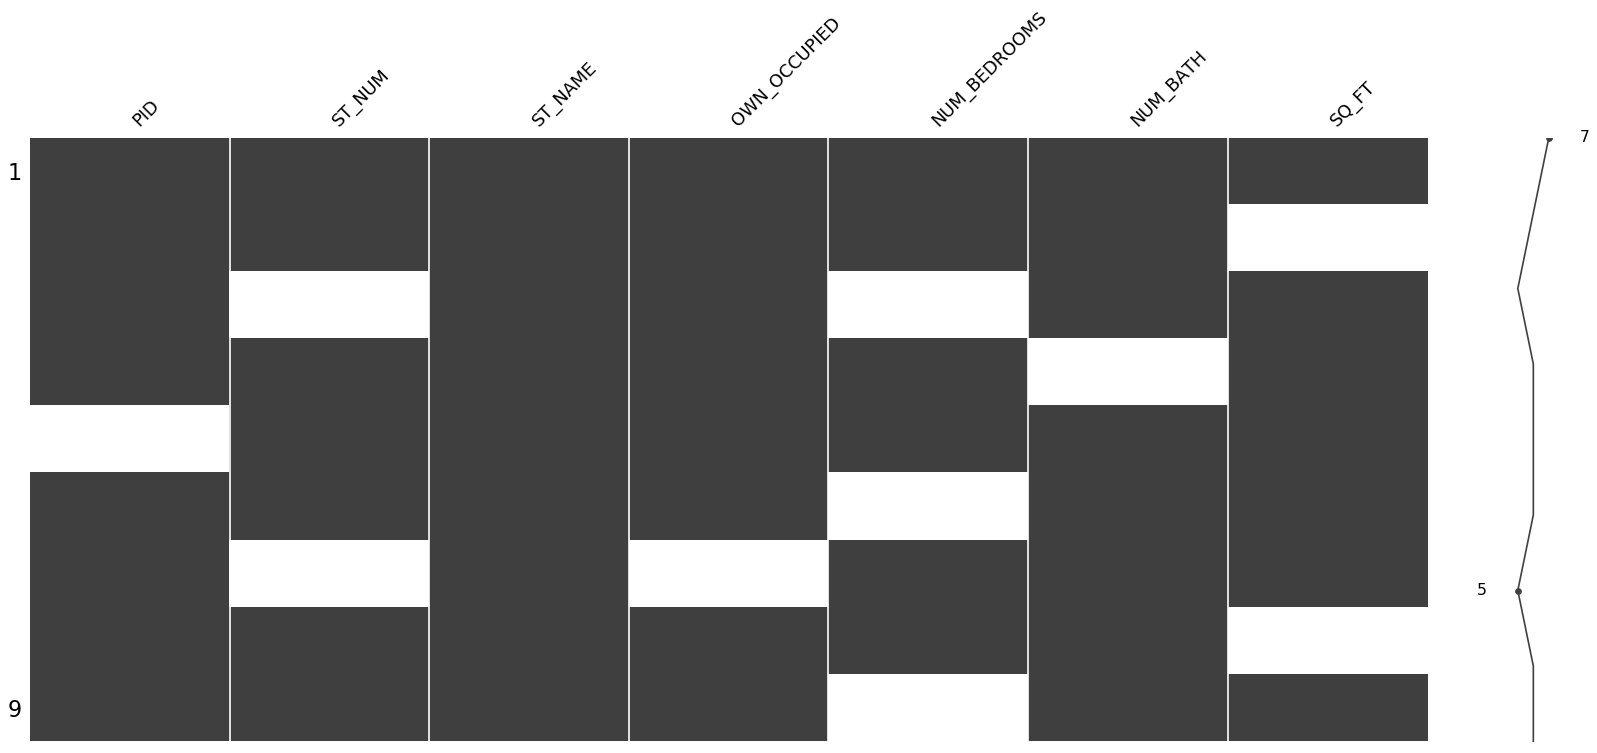

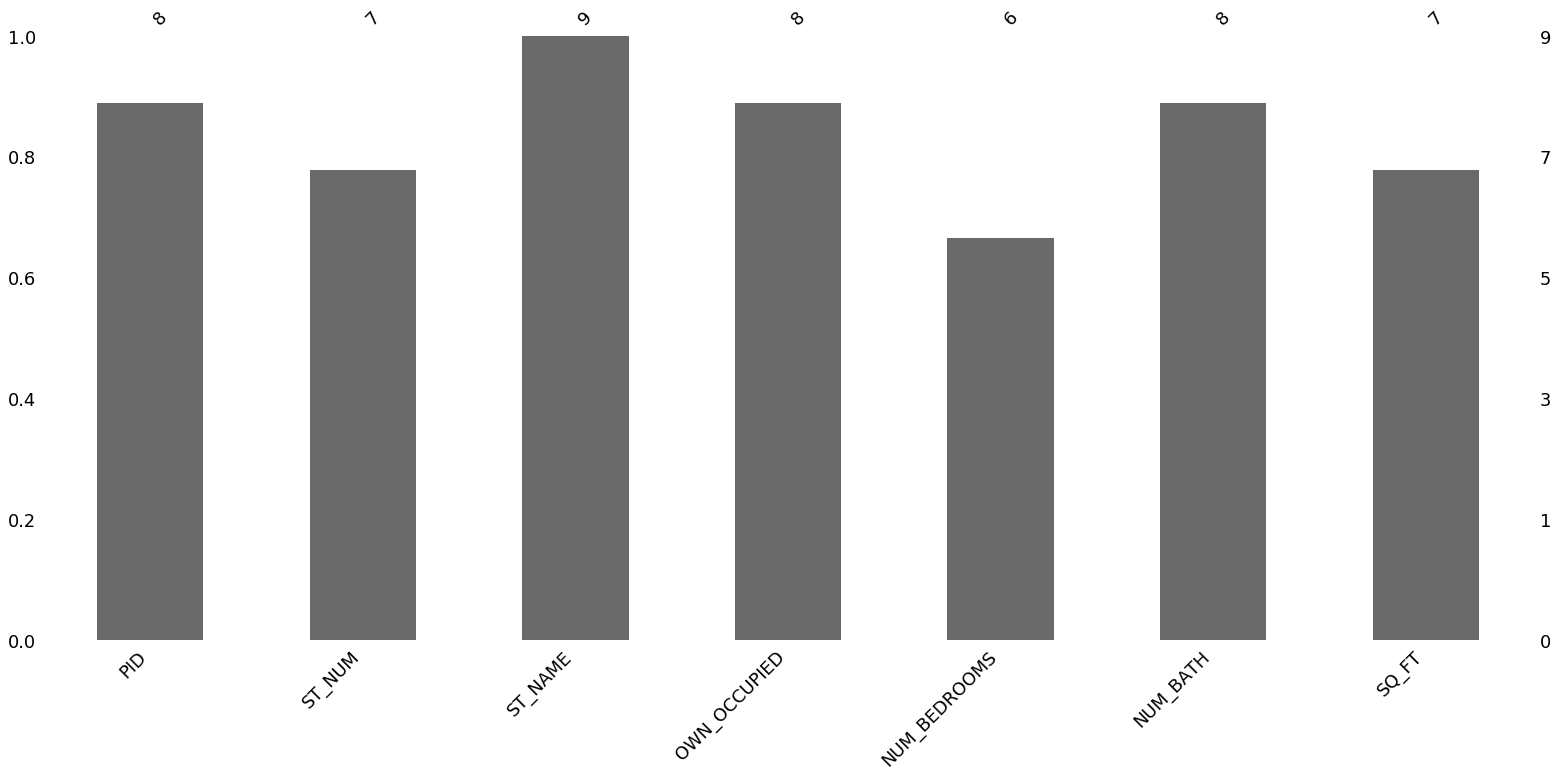

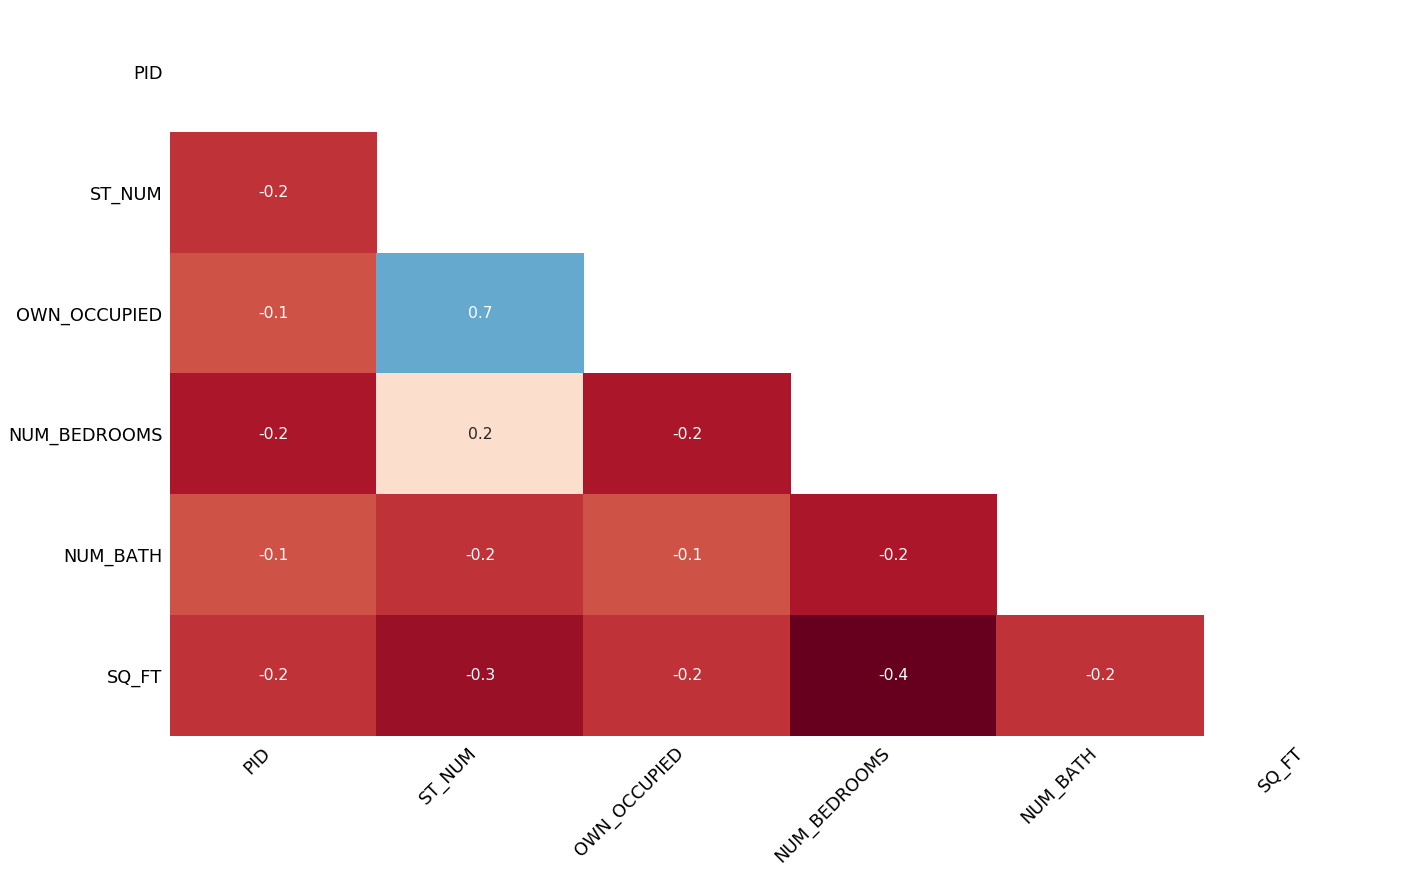

In [6]:
identify_missing(df_csv)

### Detect missing data for openml dataset

In [7]:
data = oml.datasets.get_dataset(334)
Xy = data.get_data()
Xy.shape

(601, 7)

In [8]:
# generate missing missing 5%
mask = np.random.choice(a=[False, True], size=Xy.shape, p=[0.95, 0.05])
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [9]:
# generate missing value
Xy_incomplete = np.copy(Xy)
Xy_incomplete[mask] = np.nan
Xy_incomplete

array([[ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [nan,  2.,  2., ...,  2.,  2.,  1.],
       [ 0.,  2.,  2., ...,  2., nan,  0.],
       [ 0.,  2.,  2., ...,  2.,  3.,  1.]], dtype=float32)

In [10]:
df = pd.DataFrame(Xy_incomplete)
df.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Missing values detected!
Number of missing in each feature
0    38
1    25
2    29
3    34
4    29
5    36
6    34
dtype: int64
Missing correlation (Pearson correlation coefficient) between every 2 features


,0,1,2,3,4,5,6
0,1.000000,-0.019884,0.037211,-0.034025,-0.058498,-0.007958,-0.034025
1,-0.019884,1.000000,-0.046909,-0.051016,-0.008023,-0.017471,0.093269
2,0.037211,-0.046909,1.000000,0.045687,-0.014468,0.041321,0.045687
3,-0.034025,-0.051016,0.045687,1.000000,0.045687,0.059590,-0.059965
4,-0.058498,-0.008023,-0.014468,0.045687,1.000000,-0.024117,-0.055138
5,-0.007958,-0.017471,0.041321,0.059590,-0.024117,1.000000,-0.061812
6,-0.034025,0.093269,0.045687,-0.059965,-0.055138,-0.061812,1.000000


Missing mechanism is highly possible to be missing completely at random
Visualize missing data


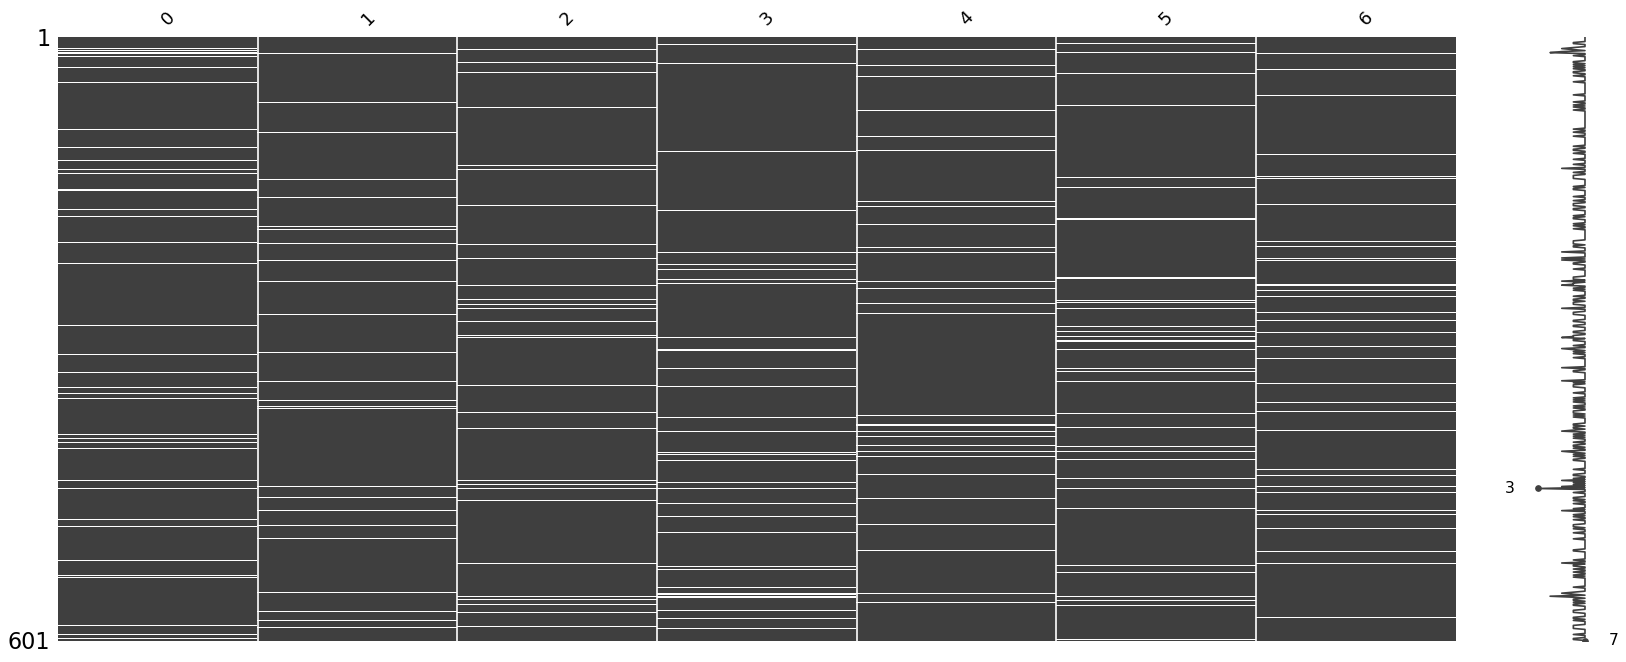

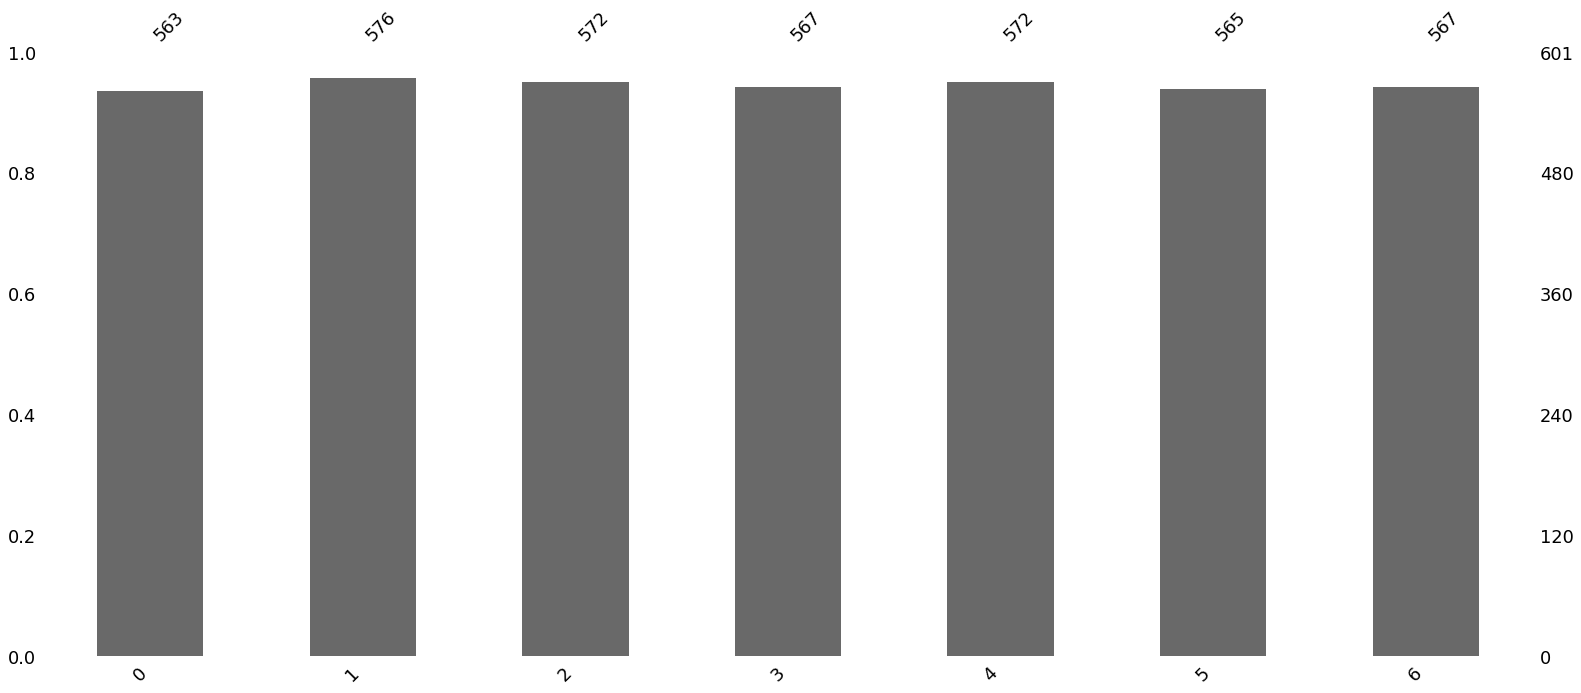

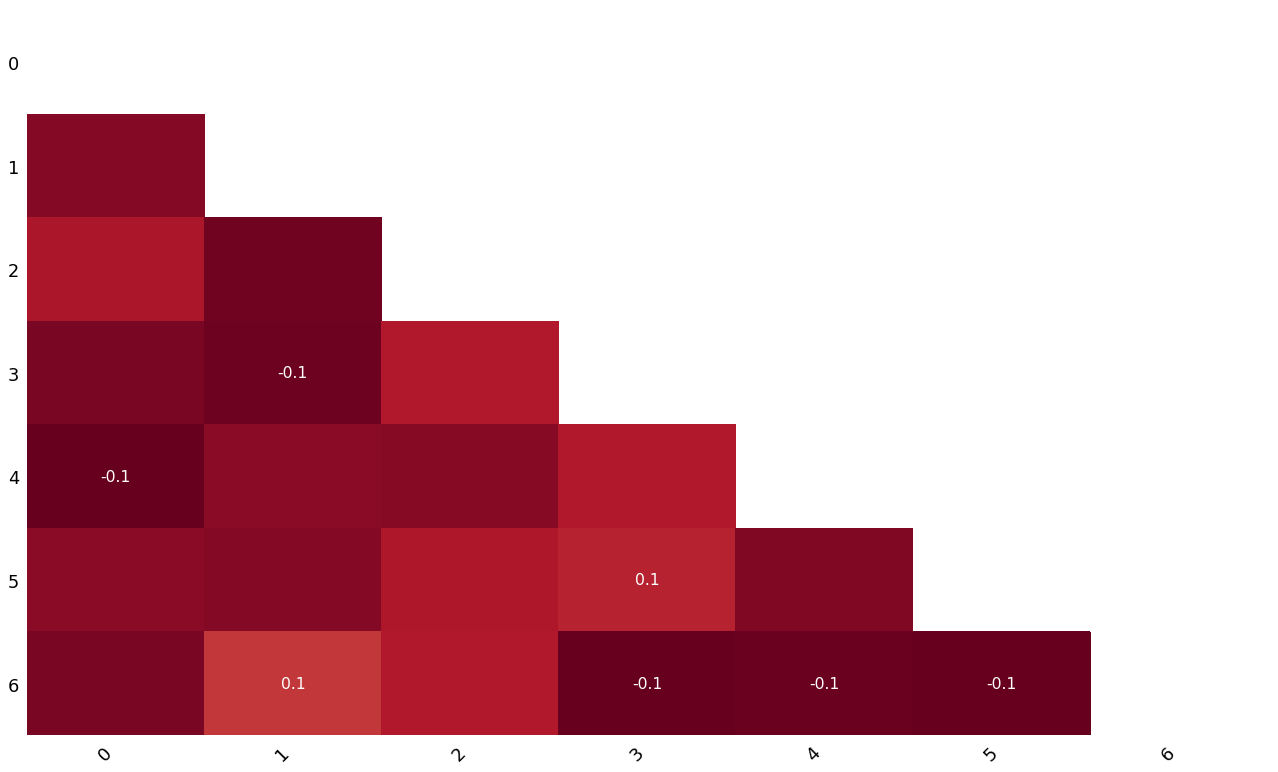

In [11]:
identify_missing(df)

## Clean Missing

In [12]:
from sklearn.preprocessing import Imputer
from fancyimpute import KNN, IterativeImputer, MatrixFactorization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
import warnings
warnings.filterwarnings('ignore')

D:\Programfiles\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
def missing_preprocess(df=None):
    """
    detect and drop empty rows
    detect features and instances with extreme large proportion of missing data
    """
    
    # number of missing in each row
#     print(df.isnull().sum(axis=1))

    # number of missing in each feature
#     print(df.isnull().sum())
    
    # number of instances
    num_instances = df.shape[0]
    # number of features
    num_features = df.shape[1]
    
    # detect empty rows
    if any(df.isnull().sum(axis=1) == num_features):
        print(df[df.isnull().sum(axis=1) == num_features])
        print("Above empty rows are detected and removed \n")
        df = df.dropna(how='all') # remove empty rows
    
    large_missing_cols=[] # list of columns with extreme large proportion of missing data
    for col in df.columns:
        if df[col].isnull().sum() > 0.9 * num_instances:
            large_missing_cols.append(col)
    if large_missing_cols:
        print("Feature {} has extreme large proportion of missing data".format(large_missing_cols))
        ans = input('Do you want to delete the above features? [y/n]')
        if ans == 'y':
            df.drop(large_missing_cols,1, inplace=True)
        else:
            pass
    return df

Techniques to deal with missing data <br>
0 list delete <br>
1 mean <br>
2 mode <br>
3 knn <br>
4 matrix factorization <br>
5 multiple imputation <br>

In [14]:
def compute_imputation_score(Xy):
    """
    Compute score of the imputation by applying simple classifiers
    The following simple learners are evaluated:
    Naive Bayes Learner;
    Linear Discriminant Learner;
    One Nearest Neighbor Learner;
    Decision Node Learner;
    ---
    input:
    
    Xy: complete numpy array
    
    """
    X = Xy[:,:-1]
#     print(X.dtype)
    y = Xy[:,-1]
    y = y.astype('int')
#     print(y.dtype)
    
    scores =[]
    naive_bayes = GaussianNB()
    decision_node = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=1, random_state=0)
    linear_discriminant_analysis = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
    one_nearest_neighbor =  KNeighborsClassifier(n_neighbors = 1)
    classifiers = [naive_bayes, decision_node, linear_discriminant_analysis, one_nearest_neighbor]
    for classifier in classifiers:
        # compute accuracy score for each simple classifier
        score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1))
#         print("Score of {} is {}".format(classifier, score))
        scores.append(score)
        
    imputation_score = np.mean(scores)
    return imputation_score

In [15]:
def deal_mcar(df):
    """
    Deal with missing data with missing completely at random pattern
    
    ---
    input:
    
    df: input DataFrame
    """
    # number of instances
    num_instances = df.shape[0]
    
    # number of rows containing missing
    num_missing_instances = df.isnull().sum(axis=1).astype(bool).sum()
    
    # missing percentage
    missing_percentage = num_missing_instances / num_instances
    print("Missing percentage is {}".format(missing_percentage))
    
    if missing_percentage < 0.05:
        recommend = 'list deletion'
    else:
        Xy_incomplete = df.values
        # mean
        Xy_filled_mean = Imputer(missing_values=np.nan, strategy='mean').fit_transform(Xy_incomplete)
        score_mean = compute_imputation_score(Xy_filled_mean)
        print("Imputation score of mean is {}".format(score_mean))
        # mode
        Xy_filled_mode = Imputer(missing_values=np.nan, strategy='most_frequent').fit_transform(Xy_incomplete)
        score_mode = compute_imputation_score(Xy_filled_mode)
        print("Imputation score of mode is {}".format(score_mode))
        # knn
        Xy_filled_knn = KNN().fit_transform(Xy_incomplete);
        score_knn = compute_imputation_score(Xy_filled_knn)
        print("Imputation score of knn is {}".format(score_knn))
        # matrix factorization
        Xy_filled_mf = MatrixFactorization().fit_transform(Xy_incomplete);
        score_mf = compute_imputation_score(Xy_filled_mf)
        print("Imputation score of knn is {}".format(score_knn))
        # multiple imputation
        Xy_filled_ii = IterativeImputer().fit_transform(Xy_incomplete)
        score_ii = compute_imputation_score(Xy_filled_ii)
        print("Imputation score of ii is {}".format(score_ii))
        
        score_dict = {'mean': score_mean, 'mode': score_mode, 'knn': score_knn,
                      'matrix factorization': score_mf, 'multiple imputation': score_ii}
        print("Imputation method with the highest socre is {}".format(max(score_dict, key=score_dict.get)))
        recommend = max(score_dict, key=score_dict.get)
    return recommend

In [16]:
def deal_mar(df):
    """
    Deal with missing data with missing at random pattern
    
    ---
    input:
    
    df: input DataFrame
    """
    
    Xy_incomplete = df.values

    # knn
    Xy_filled_knn = KNN().fit_transform(Xy_incomplete);
    score_knn = compute_imputation_score(Xy_filled_knn)
    print("Imputation score of knn is {}".format(score_knn))
    # matrix factorization
    Xy_filled_mf = MatrixFactorization().fit_transform(Xy_incomplete);
    score_mf = compute_imputation_score(Xy_filled_mf)
    print("Imputation score of knn is {}".format(score_knn))
    # multiple imputation
    Xy_filled_ii = IterativeImputer().fit_transform(Xy_incomplete)
    score_ii = compute_imputation_score(Xy_filled_ii)
    print("Imputation score of ii is {}".format(score_ii))

    score_dict = {'mean': score_mean, 'mode': score_mode, 'knn': score_knn,
                  'matrix factorization': score_mf, 'multiple imputation': score_ii}
    print("Imputation method with the highest socre is {}".format(max(score_dict, key=score_dict.get)))
    recommend = max(score_dict, key=score_dict.get)
    return recommend

In [17]:
def deal_mnar(df):
    """
    Deal with missing data with missing at random pattern
    
    ---
    input:
    
    df: input DataFrame
    """
    recommend = 'multiple imputation'
    return recommend

In [18]:
def clean_missing(Xy):
#     Xy = np.concatenate((X,y.reshape((y.shape[0],1))), axis=1)
    df = pd.DataFrame(Xy)
    df_preprocessed = missing_preprocess(df)
    print("Choose the missing mechanism [a/b/c/d]:")
    print("a.MCAR b.MAR c.MNAR d.Skip")
    ans = input()
    if ans == 'a':
        recommend = deal_mcar(df_preprocessed)
    elif ans == 'b':
        recommend = deal_mar(df_preprocessed)
    elif ans == 'c':
        recommend = deal_mnar(df_preprocessed)
    else:
        recommend = deal_mar(df_preprocessed)
    print("The recommended approach is {}".format(recommend))

In [19]:
clean_missing(Xy_incomplete)

Choose the missing mechanism [a/b/c/d]:
a.MCAR b.MAR c.MNAR d.Skip
a
Missing percentage is 0.32945091514143093
Imputation score of mean is 0.5243764902655277
Imputation score of mode is 0.5064587818598514
Imputing row 1/601 with 0 missing, elapsed time: 0.055
Imputing row 101/601 with 0 missing, elapsed time: 0.056
Imputing row 201/601 with 0 missing, elapsed time: 0.057
Imputing row 301/601 with 0 missing, elapsed time: 0.058
Imputing row 401/601 with 0 missing, elapsed time: 0.059
Imputing row 501/601 with 0 missing, elapsed time: 0.060
Imputing row 601/601 with 0 missing, elapsed time: 0.061
Imputation score of knn is 0.5297618179503207
Train on 3583 samples, validate on 399 samples
Epoch 1/10000
3583/3583 [==============================] - 0s 57us/step - loss: 1.1334 - val_loss: 1.0645
Epoch 2/10000
3583/3583 [==============================] - 0s 1us/step - loss: 1.1294 - val_loss: 1.0641
Epoch 3/10000
3583/3583 [==============================] - 0s 1us/step - loss: 1.1265 - val_lo

Epoch 72/10000
3583/3583 [==============================] - 0s 1us/step - loss: 0.9318 - val_loss: 1.0369
Epoch 73/10000
3583/3583 [==============================] - 0s 1us/step - loss: 0.9293 - val_loss: 1.0367
Imputation score of knn is 0.5297618179503207
Imputation score of ii is 0.5298244959140682
Imputation method with the highest socre is multiple imputation
The recommended approach is multiple imputation
